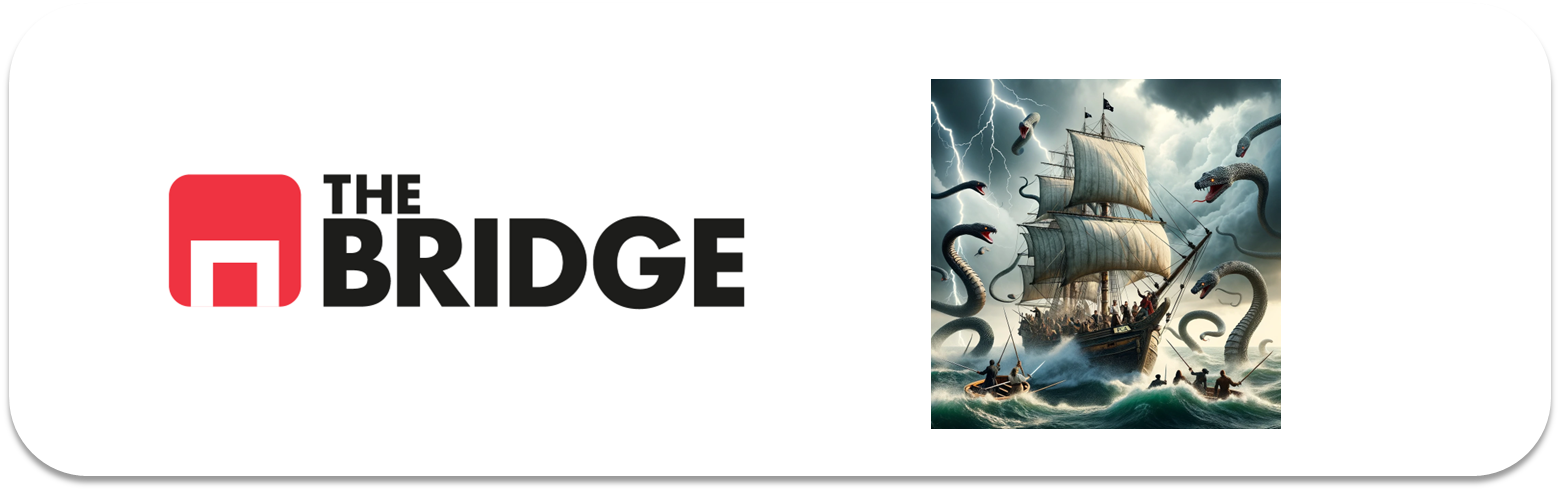

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, balanced_accuracy_score, recall_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel, RFE, SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [62]:
df = pd.read_csv('data/credit_npo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [63]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [64]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000
mean,0.070244,0.335668,51.447698,0.340471,0.499708,6864.815420,8.759140,0.180010,1.059580,0.149712,0.856804
std,0.255568,0.365209,14.516270,2.927409,2.696067,11855.905437,5.129772,2.892577,1.140716,2.868248,1.147509
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034927,41.000000,0.000000,0.143456,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.179183,51.000000,0.000000,0.294748,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.587187,62.000000,0.000000,0.477414,8300.000000,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,6.000000,101.000000,98.000000,96.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [65]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


In [66]:
# Feature 1: NumberOfTime30-59DaysPastDueNotWorse
df_train['NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=[-1, 0, 1, float('inf')], labels=[0, 1, 2])

In [67]:
# Feature 2: NumberOfTime60-89DaysPastDueNotWorse
df_train['NumberOfTimes90DaysLate'] = pd.cut(df_train['NumberOfTimes90DaysLate'], bins=[-1, 0, 1, float('inf')], labels=[0, 1, 2])

In [68]:
# Feature 3: NumberOfTimes90DaysLate
df_train['NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'], bins=[-1, 0, 1, float('inf')], labels=[0, 1, 2])

In [69]:
df_train.dtypes

SeriousDlqin2yrs                           int64
RevolvingUtilizationOfUnsecuredLines     float64
age                                        int64
NumberOfTime30-59DaysPastDueNotWorse    category
DebtRatio                                float64
MonthlyIncome                            float64
NumberOfOpenCreditLinesAndLoans            int64
NumberOfTimes90DaysLate                 category
NumberRealEstateLoansOrLines               int64
NumberOfTime60-89DaysPastDueNotWorse    category
NumberOfDependents                       float64
dtype: object

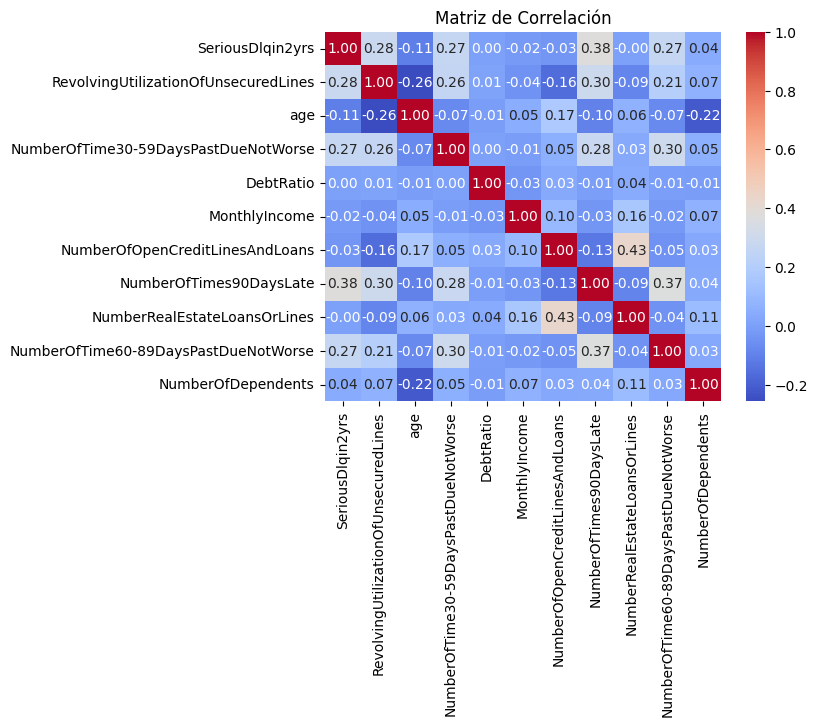

In [70]:
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [71]:
target = 'SeriousDlqin2yrs'

corr_with_target = df_train.corr()[target]
abs_corr_with_target = np.abs(corr_with_target).sort_values(ascending=False)

print(abs_corr_with_target)

SeriousDlqin2yrs                        1.000000
NumberOfTimes90DaysLate                 0.380709
RevolvingUtilizationOfUnsecuredLines    0.284084
NumberOfTime60-89DaysPastDueNotWorse    0.267760
NumberOfTime30-59DaysPastDueNotWorse    0.267413
age                                     0.107801
NumberOfDependents                      0.038829
NumberOfOpenCreditLinesAndLoans         0.032472
MonthlyIncome                           0.018163
DebtRatio                               0.001863
NumberRealEstateLoansOrLines            0.001677
Name: SeriousDlqin2yrs, dtype: float64


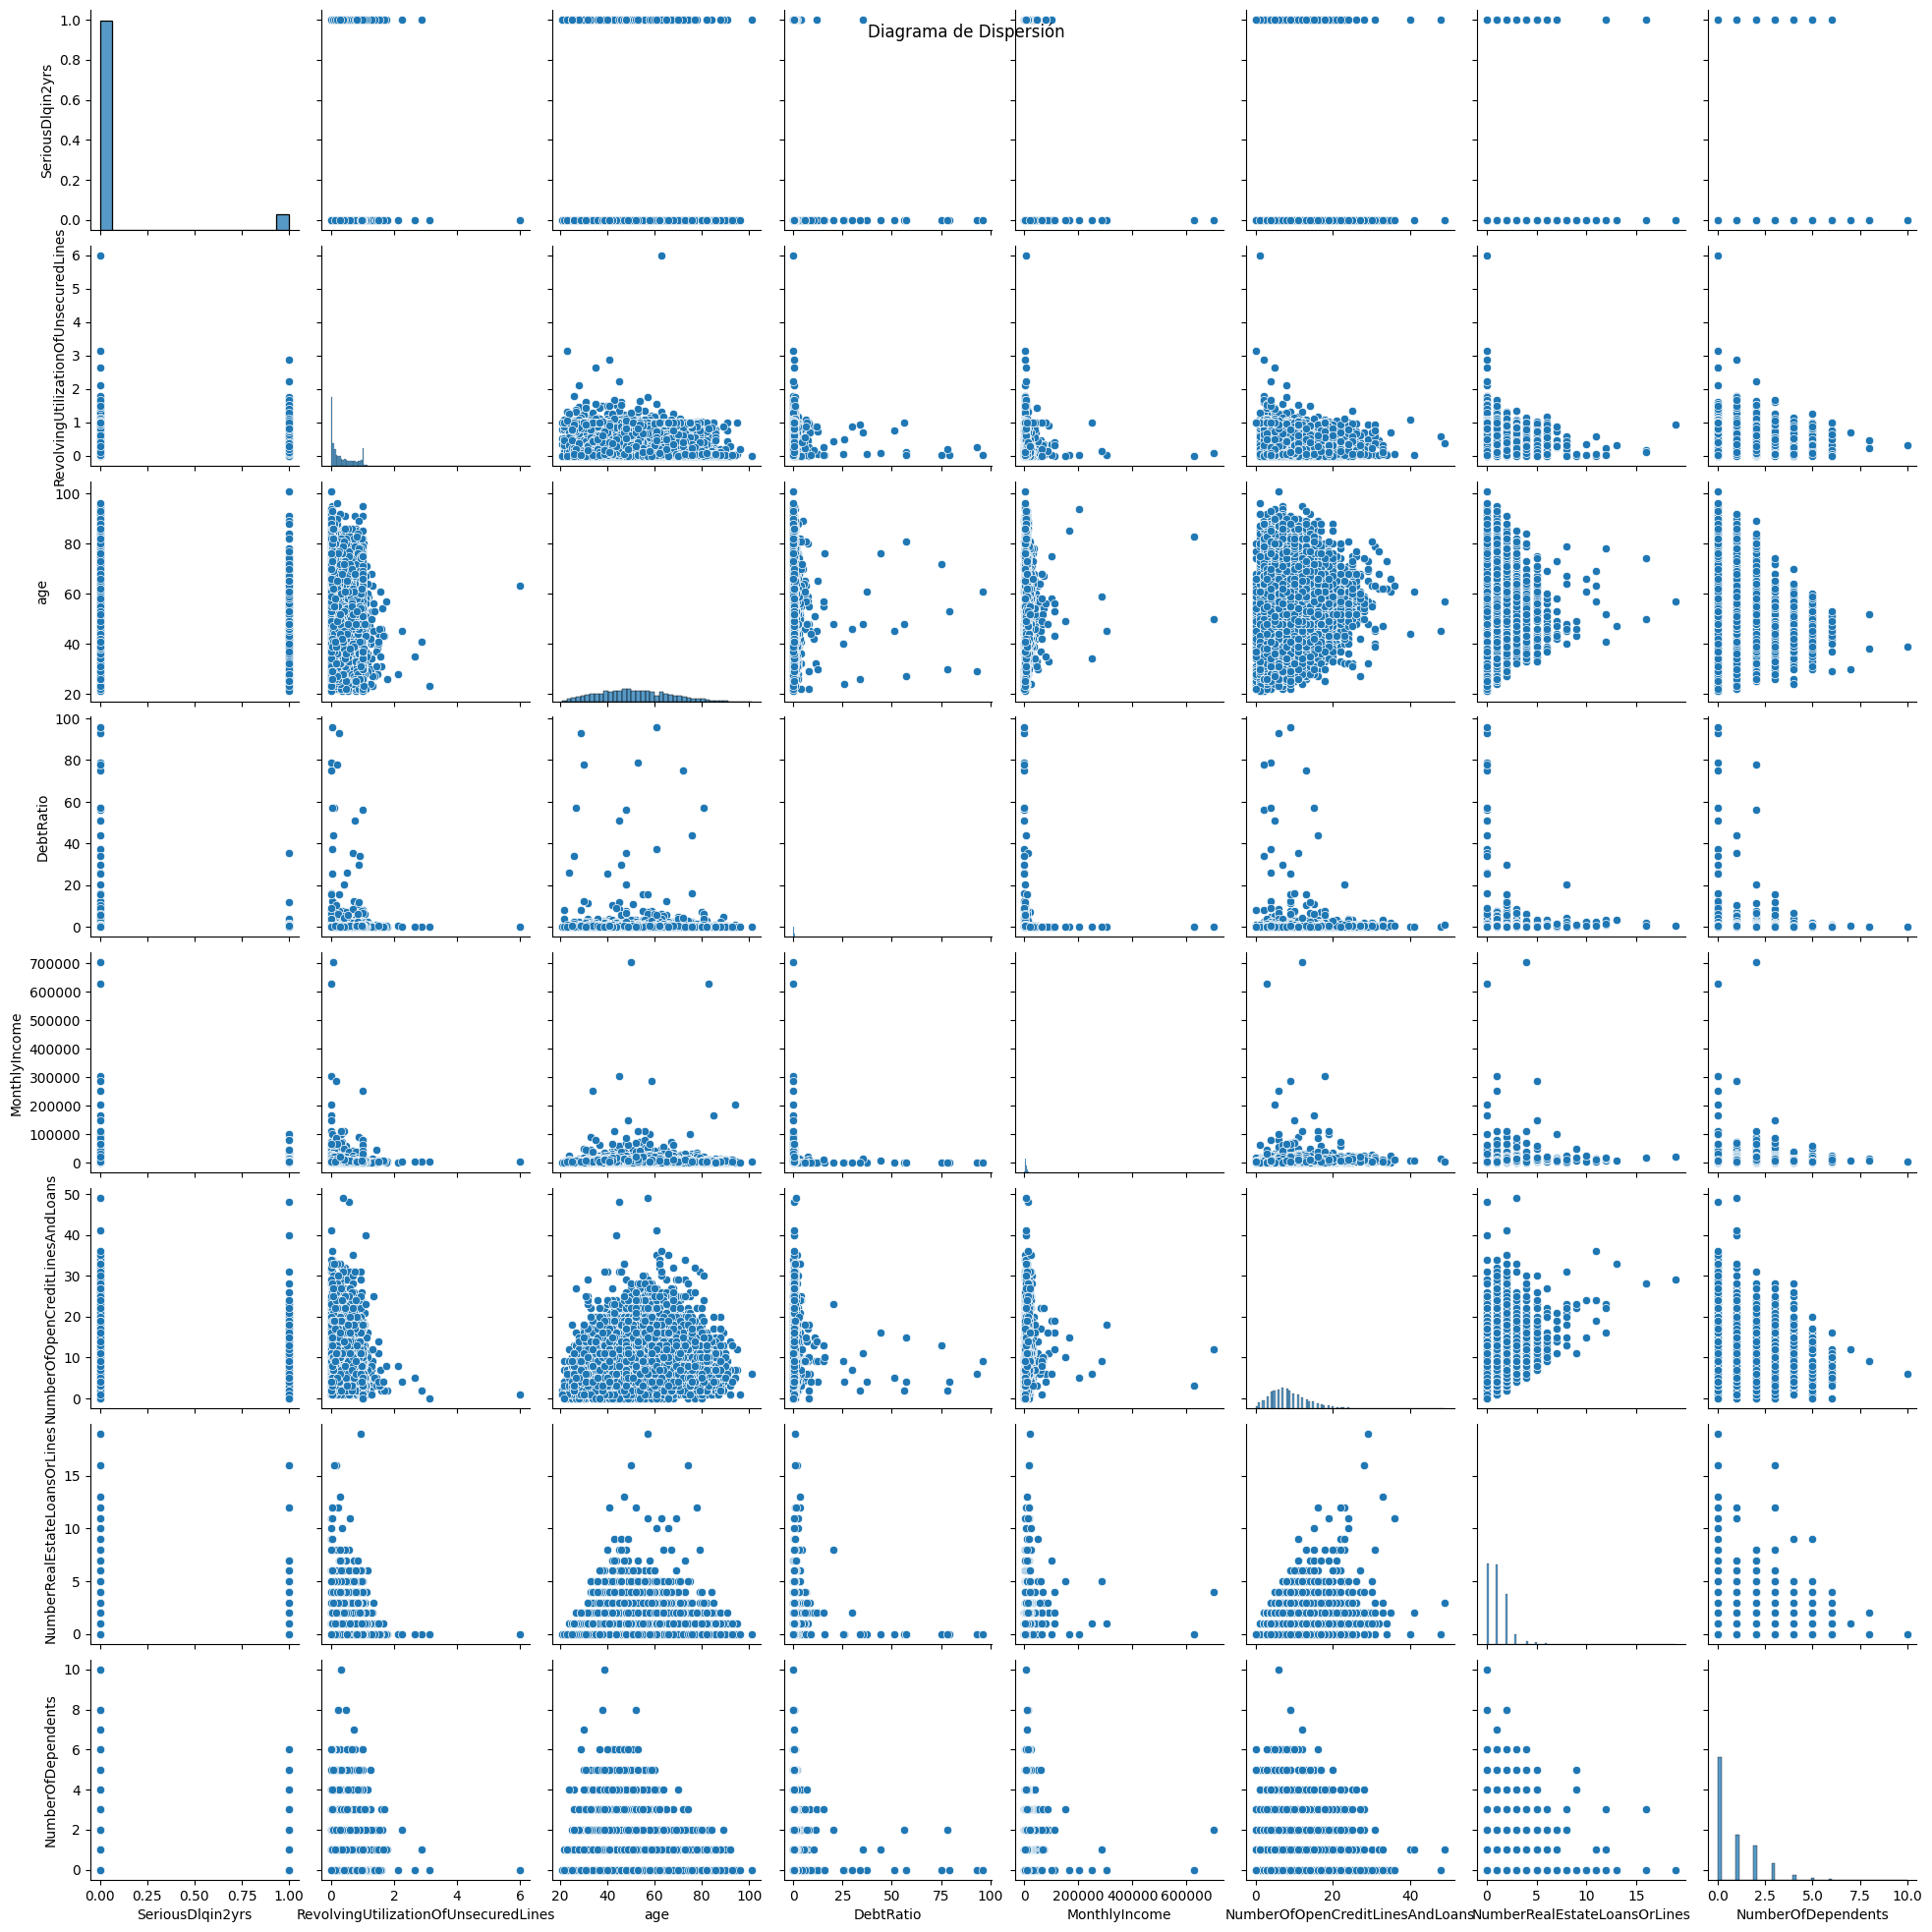

In [72]:
sns.pairplot(df_train)
plt.suptitle('Diagrama de Dispersión')
plt.show()

In [73]:
df_train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [74]:
corr_threshold = 0.7  # Establece tu umbral de correlación
high_corr_vars = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            colname = corr_matrix.columns[i]
            high_corr_vars.add(colname)

df_filtered_corr = df_train.drop(columns=high_corr_vars)


In [75]:
df_filtered_corr

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
11145,0,0.391240,68,0,2.693124,2166.0,13,0,2,0,0.0
2012,0,0.906540,59,0,0.325227,6496.0,7,0,0,0,1.0
5428,0,0.933223,52,1,0.372442,8258.0,3,0,1,0,3.0
12130,0,0.857859,50,0,0.511098,5225.0,9,0,1,0,0.0
36,0,0.000000,61,0,0.414167,5166.0,5,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11966,0,0.397822,53,0,0.332584,11560.0,14,0,2,0,0.0
5512,0,0.015171,76,0,0.005427,3500.0,4,0,0,0,0.0
5719,0,0.988201,62,0,0.450432,8442.0,4,0,1,0,0.0
922,0,0.122072,41,0,0.638133,3749.0,9,0,1,0,1.0


In [76]:
cov_threshold = 100  # Establece tu umbral de covarianza
high_cov_vars = set()

cov_matrix = df_train.cov()

for i in range(len(cov_matrix.columns)):
    for j in range(i):
        if abs(cov_matrix.iloc[i, j]) > cov_threshold:
            colname = cov_matrix.columns[i]
            high_cov_vars.add(colname)

df_filtered_cov = df_train.drop(columns=high_cov_vars)


In [77]:
from sklearn.feature_selection import SelectKBest, f_classif

target = 'SeriousDlqin2yrs'

# Filtra solo las características numéricas
numeric_features = df_train.select_dtypes(include=['float64', 'int64','category']).columns

# Excluye la columna objetivo de las características numéricas
numeric_features = numeric_features[numeric_features != target]

# Aplica ANOVA para seleccionar las mejores características numéricas
num_features_anova = SelectKBest(f_classif, k='all')
num_features_anova.fit(df_train[numeric_features], df_train[target])

# Muestra los resultados de ANOVA
anova_scores = pd.DataFrame({'Feature': numeric_features, 'ANOVA Score': num_features_anova.scores_})
anova_scores = anova_scores.sort_values(by='ANOVA Score', ascending=False)

print(anova_scores)


                                Feature  ANOVA Score
6               NumberOfTimes90DaysLate  1601.848780
0  RevolvingUtilizationOfUnsecuredLines   829.602605
8  NumberOfTime60-89DaysPastDueNotWorse   729.850229
2  NumberOfTime30-59DaysPastDueNotWorse   727.811655
1                                   age   111.110548
9                    NumberOfDependents    14.268878
5       NumberOfOpenCreditLinesAndLoans     9.975168
4                         MonthlyIncome     3.118382
3                             DebtRatio     0.032795
7          NumberRealEstateLoansOrLines     0.026574


In [78]:
from sklearn.feature_selection import mutual_info_classif

# Filtra solo las características categóricas
categorical_features = df_train.select_dtypes(include=['category', 'int', 'float']).columns

# Aplica Mutual Information para seleccionar las mejores características categóricas
cat_features_mi = mutual_info_classif(df_train[categorical_features], df_train[target], random_state=42)

# Muestra los resultados de Mutual Information
mi_scores = pd.DataFrame({'Feature': categorical_features, 'Mutual Information Score': cat_features_mi})
mi_scores = mi_scores.sort_values(by='Mutual Information Score', ascending=False)

print(mi_scores)


                                 Feature  Mutual Information Score
0                       SeriousDlqin2yrs                  0.254064
1   RevolvingUtilizationOfUnsecuredLines                  0.042664
7                NumberOfTimes90DaysLate                  0.031702
3   NumberOfTime30-59DaysPastDueNotWorse                  0.024591
9   NumberOfTime60-89DaysPastDueNotWorse                  0.018392
8           NumberRealEstateLoansOrLines                  0.007191
2                                    age                  0.006775
6        NumberOfOpenCreditLinesAndLoans                  0.005173
5                          MonthlyIncome                  0.003538
4                              DebtRatio                  0.000720
10                    NumberOfDependents                  0.000000


In [79]:
# Filtra todas las características que son numéricas o categóricas
all_features = df_train.select_dtypes(include=['category', 'int', 'float']).columns

# Divide el conjunto de datos en características (X) y la variable objetivo (y)
X = df_train[all_features].drop(target, axis=1)  # Excluye la columna objetivo
y = df_train[target]

# Inicializa un clasificador, por ejemplo, Random Forest
clf = RandomForestClassifier(random_state=42)

# Inicializa el objeto SelectFromModel con el clasificador y ajusta a los datos
sfm = SelectFromModel(clf)
sfm.fit(X, y)

# Obtiene las características seleccionadas
selected_features = X.columns[sfm.get_support()]

# Muestra las características seleccionadas
print("Características seleccionadas:")
print(selected_features)


Características seleccionadas:
Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfTimes90DaysLate'],
      dtype='object')


In [80]:
# Filtra todas las características que son numéricas o categóricas
all_features = df_train.select_dtypes(include=['category', 'int', 'float']).columns

# Divide el conjunto de datos en características (X) y la variable objetivo (y)
X = df_train[all_features].drop(target, axis=1)  # Excluye la columna objetivo
y = df_train[target]

# Inicializa el clasificador, por ejemplo, Random Forest
clf = RandomForestClassifier(random_state=42)

# Inicializa el objeto RFE con el clasificador y ajusta a los datos
rfe = RFE(clf, n_features_to_select=5)  # Selecciona el número deseado de características
rfe.fit(X, y)

# Obtiene las características seleccionadas
selected_features = X.columns[rfe.support_]

# Muestra las características seleccionadas
print("Características seleccionadas:")
print(selected_features)


Características seleccionadas:
Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfTimes90DaysLate'],
      dtype='object')


In [81]:
# Filtra todas las características que son numéricas o categóricas
all_features = df_train.select_dtypes(include=['category', 'int', 'float']).columns

# Divide el conjunto de datos en características (X) y la variable objetivo (y)
X = df_train[all_features].drop(target, axis=1)  # Excluye la columna objetivo
y = df_train[target]

# Inicializa el clasificador, por ejemplo, Random Forest
clf = RandomForestClassifier(random_state=42)

# Inicializa el objeto SFS con el clasificador y ajusta a los datos
sfs = SequentialFeatureSelector(clf, n_features_to_select=5, direction='forward')  # Selecciona el número deseado de características
sfs.fit(X, y)

# Obtiene las características seleccionadas
selected_features = X.columns[sfs.get_support()]

# Muestra las características seleccionadas
print("Características seleccionadas:")
print(selected_features)


Características seleccionadas:
Index(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [82]:
# Características seleccionadas en cada paso
selected_features_anova = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate']
selected_features_mi = ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse']
selected_features_sfs = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

In [83]:
# Combina todas las características seleccionadas
all_selected_features = selected_features_anova + selected_features_mi + selected_features_sfs

# Cuenta cuántas veces cada característica fue seleccionada
feature_votes = Counter(all_selected_features)

# Establece un umbral (por ejemplo, seleccionadas por al menos 2 métodos)
umbral = 2
final_selected_features = [feature for feature, count in feature_votes.items() if count >= umbral]

# Muestra las características seleccionadas por el sistema de hard-voting
print("Características seleccionadas por hard-voting:")
print(final_selected_features)


Características seleccionadas por hard-voting:
['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse']


In [84]:
# Seleccionar hasta 6 características principales según Mutual Information
selected_features_mi = ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'age']

# Seleccionar hasta 6 características principales según SFS
selected_features_sfs = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'RevolvingUtilizationOfUnsecuredLines']

# Seleccionar hasta 6 características principales según SelectFromModel
selected_features_select_from_model = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']

# Seleccionar hasta 6 características principales según RFE
selected_features_rfe = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']

# Seleccionar hasta 6 características principales según hard-voting
final_selected_features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']


In [85]:

# Definir modelos
model_rf = RandomForestClassifier(random_state=42)
model_svc = SVC(random_state=42)
model_lr = LogisticRegression(random_state=42)

# Lista de modelos
models = [model_rf, model_svc, model_lr]

# Lista de características seleccionadas para cada paso anterior
feature_selections = [
    selected_features_anova,
    selected_features_mi,
    selected_features_sfs,
    selected_features_select_from_model,
    selected_features_rfe,
    final_selected_features
]

# Crear función para evaluar modelos con recall medio
scorer = make_scorer(recall_score, average='macro')

# Resultados
results = []

# Entrenar y evaluar modelos para cada selección de características
for model in models:
    model_results = []
    for features in feature_selections:
        X_train_selected = df_train[features]
        scores = cross_val_score(model, X_train_selected, df_train['SeriousDlqin2yrs'], cv=5, scoring=scorer)
        model_results.append(scores.mean())
    results.append(model_results)

# Convertir resultados a DataFrame para visualización
results_df = pd.DataFrame(results, index=['RandomForest', 'SVM', 'LogisticRegression'], columns=[
    'ANOVA', 'MutualInformation', 'SFS', 'SelectFromModel', 'RFE', 'HardVoting'
])

c:\Users\julio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\julio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

                       ANOVA  MutualInformation       SFS  SelectFromModel  \
RandomForest        0.592967                1.0  0.593471         0.592095   
SVM                 0.500000                0.5  0.582649         0.500000   
LogisticRegression  0.587436                1.0  0.590950         0.593122   

                         RFE  HardVoting  
RandomForest        0.592095    0.592095  
SVM                 0.500000    0.500000  
LogisticRegression  0.593122    0.593122  


In [86]:
results_df

,ANOVA,MutualInformation,SFS,SelectFromModel,RFE,HardVoting
RandomForest,0.592967,1.0,0.593471,0.592095,0.592095,0.592095
SVM,0.500000,0.5,0.582649,0.500000,0.500000,0.500000
LogisticRegression,0.587436,1.0,0.590950,0.593122,0.593122,0.593122


In [ ]:
'''
Al evaluar los resultados, parece que los modelos RandomForest y Logistic Regression tienen un rendimiento relativamente similar en términos de recall medio en las diferentes selecciones de características. 
Sin embargo, hay algunas cosas a tener en cuenta:

El modelo RandomForest tiene un rendimiento perfecto (recall medio de 1.0) con Mutual Information y Hard Voting. 
Esto podría ser una señal de sobreajuste, especialmente si el modelo se evalúa en un conjunto de prueba independiente y no en el conjunto de entrenamiento.

Logistic Regression también tiene un rendimiento perfecto (recall medio de 1.0) con Mutual Information y Hard Voting. 
Al igual que con RandomForest, debes tener cuidado con el sobreajuste.

SVM parece tener un rendimiento más bajo en general en comparación con RandomForest y Logistic Regression.

Dado que estás buscando el mejor rendimiento general, podrías considerar el modelo RandomForest con alguna selección de características específicas. 
Sin embargo, es importante validar estos modelos en un conjunto de prueba independiente para evitar el sobreajuste. 
También podrías explorar ajustes adicionales de hiperparámetros para mejorar el rendimiento del modelo.

Recuerda que la elección del modelo también puede depender de otros factores, como la interpretabilidad del modelo, el tiempo de entrenamiento y la facilidad de implementación en un entorno de producción.
'''

In [88]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo RandomForest
model_rf = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='recall_macro')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(df_train[selected_features_anova], df_train['SeriousDlqin2yrs'])

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Evaluar el modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
test_recall = recall_score(df_test['SeriousDlqin2yrs'], best_model.predict(df_test[selected_features_anova]), average='macro')
print("Recall en el conjunto de prueba:", test_recall)


Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Recall en el conjunto de prueba: 0.578597924769487


In [ ]:
''' 
Estos son los valores óptimos que el algoritmo GridSearchCV ha encontrado para los hiperparámetros del modelo RandomForest después de realizar una búsqueda exhaustiva en la cuadrícula especificada. 
Estos valores representan la combinación que maximiza la métrica de evaluación durante la validación cruzada.

Recall en el conjunto de prueba:
0.5786
El recall en el conjunto de prueba es la métrica de evaluación del modelo en datos que no ha visto durante el entrenamiento. 
En este caso, el valor de recall en el conjunto de prueba es aproximadamente 0.5786. 
El recall es una medida de la capacidad del modelo para identificar positivos reales entre todas las instancias positivas. 
Cuanto más cercano a 1, mejor es el rendimiento en esta métrica.

En resumen, el modelo RandomForest con los parámetros óptimos tiene un recall de aproximadamente 0.5786 en el conjunto de prueba. 
Es importante tener en cuenta que la interpretación exacta del valor de recall depende del contexto específico del problema y de los requisitos del negocio.
'''

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.